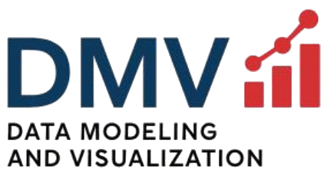

# **Week 3: Data Visualization with Bar plots, Dot plots, Heatmap, and Bullet Chart**

For this session, we will use the dataset having players details in FIFA19 game. <br>
Let us first install and import the necessary libraries.

In [41]:
try: # Import the package if already installed
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
except: # Otherwise install the package first and then import
    !pip install matplotlib
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    from plotnine import *
except:
    !pip install plotnine
    from plotnine import *


# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/'
file_name = 'fifa_data.csv'
output_plot = 'fifa.png'

# Load the data:
fifa = pd.read_csv(folder_path+file_name)

# Check if the data is loaded correctly
fifa.head(3)

Mounted at /content/drive


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


**Why do we always check the top entries only?**

In [42]:
# Let's check the bottom 6 entries
fifa.tail(6)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18201,18201,243413,D. Walsh,18,https://cdn.sofifa.org/players/4/19/243413.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,47,68,Waterford FC,...,43.0,44.0,47.0,53.0,9.0,10.0,9.0,11.0,13.0,€153K
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


Now, let us do some data preprocessing. The monetary values should be consistent for which values with 'K' are multiplied by 1000 and values with 'M' are multiplied by 1000,000. Without this step, numerical values will be considered as strings which would create problems in visualization.

In [43]:
# Helper: Convert monetary columns
import re # Library for Regular expression
def value_to_float(val):
    val = str(val)
    if 'M' in val:
        return float(val.replace('M','').replace('€','')) * 1e6
    elif 'K' in val:
        return float(val.replace('K','').replace('€','')) * 1e3
    else:
        return float(val.replace('€',''))

fifa['ValueNum'] = fifa['Value'].apply(value_to_float)
fifa['WageNum'] = fifa['Wage'].apply(value_to_float)

## Bar Plot

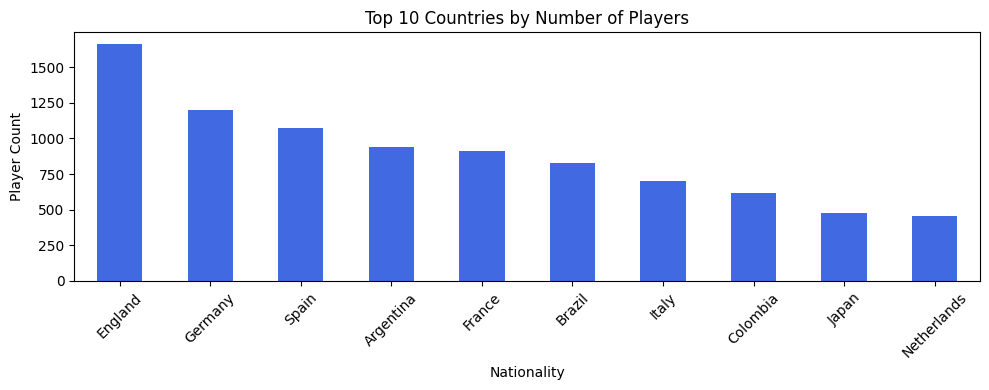

In [44]:
# 2. Simple Bar Chart: Top 10 Countries by Player Count
plt.figure(figsize=(10,4))
fifa['Nationality'].value_counts().head(10).plot(kind='bar', color='royalblue')
plt.title('Top 10 Countries by Number of Players')
plt.ylabel('Player Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

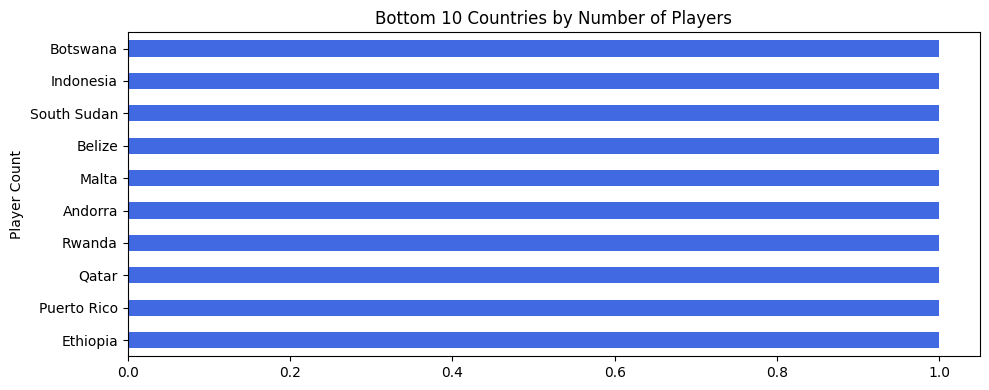

In [45]:
# 3a. Simple Horizontal Bar Chart: Bottom 10 Countries by Player Count
plt.figure(figsize=(10,4))
fifa['Nationality'].value_counts().tail(10).plot(kind='barh', color='royalblue')
plt.title('Bottom 10 Countries by Number of Players')
plt.ylabel('Player Count')
plt.xticks()
plt.tight_layout()
plt.show()

## Open question: Was the horizontal bar chart for the bottom 10 countries a good visualization?

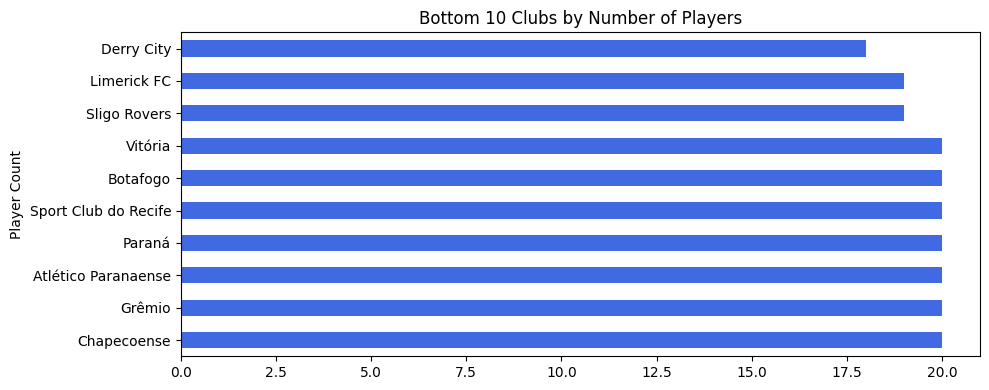

In [46]:
# 3b. Simple Horizontal Bar Chart: Bottom 10 Clubs by Player Count
plt.figure(figsize=(10,4))
fifa['Club'].value_counts().tail(10).plot(kind='barh', color='royalblue')
plt.title('Bottom 10 Clubs by Number of Players')
plt.ylabel('Player Count')
plt.xticks()
plt.tight_layout()
plt.show()

## Open question again: Why was the horizontal bar chart for the bottom 10 clubs a bad visualization again?

## **Now, let us plot the least number of players by position they play on.**

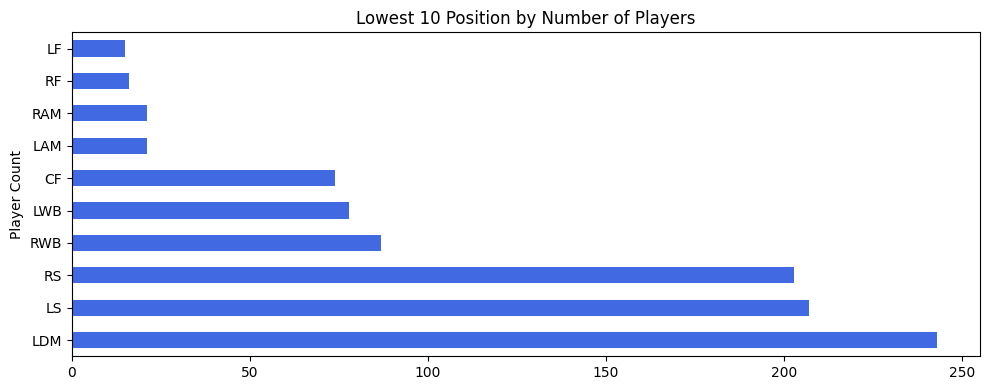

In [47]:
# 3c. Simple Horizontal Bar Chart: Bottom 10 Positions by Player Count
plt.figure(figsize=(10,4))
fifa['Position'].value_counts().tail(10).plot(kind='barh', color='royalblue')
plt.title('Lowest 10 Position by Number of Players')
plt.ylabel('Player Count')
plt.xticks()
plt.tight_layout()
plt.show()

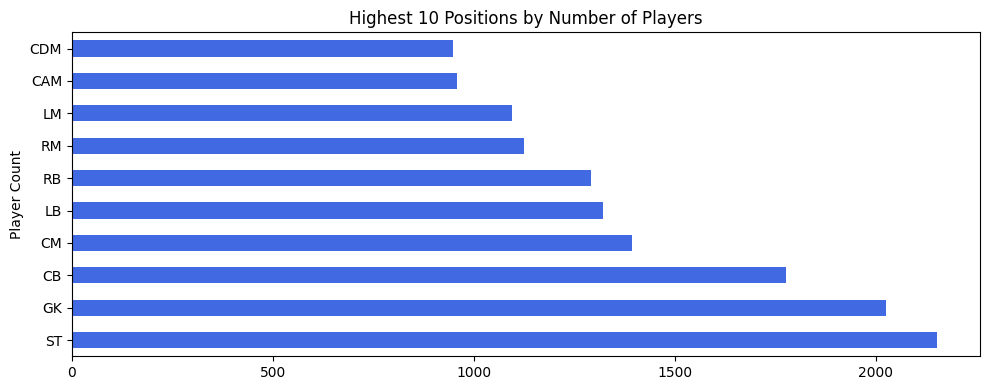

In [48]:
# 3d. Simple Horizontal Bar Chart: Top 10 Positions by Player Count
plt.figure(figsize=(10,4))
fifa['Position'].value_counts().head(10).plot(kind='barh', color='royalblue')
plt.title('Highest 10 Positions by Number of Players')
plt.ylabel('Player Count')
plt.xticks()
plt.tight_layout()
plt.show()

# Stacked Bar plot

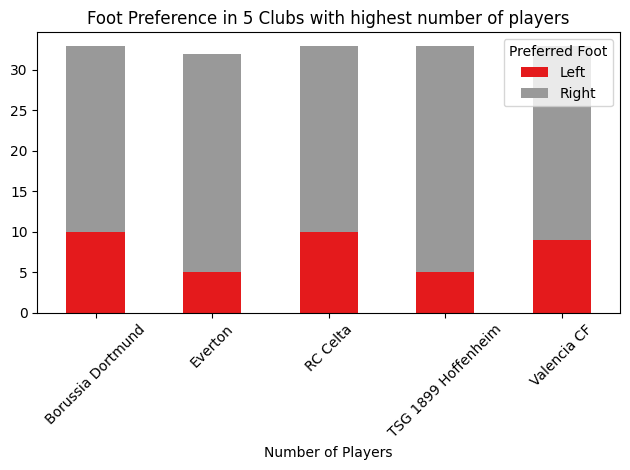

In [49]:
# 4a. Vertical Stacked Bar Chart: Foot Preference by 5 Clubs with highest number of players
top_clubs = fifa['Club'].value_counts().head(5).index
foot_data = fifa[fifa['Club'].isin(top_clubs)].groupby(['Club', 'Preferred Foot']).size().unstack().fillna(0)
foot_data.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Foot Preference in 5 Clubs with highest number of players')
plt.xticks(rotation=45)
plt.xlabel('Number of Players')
plt.tight_layout()
plt.show()

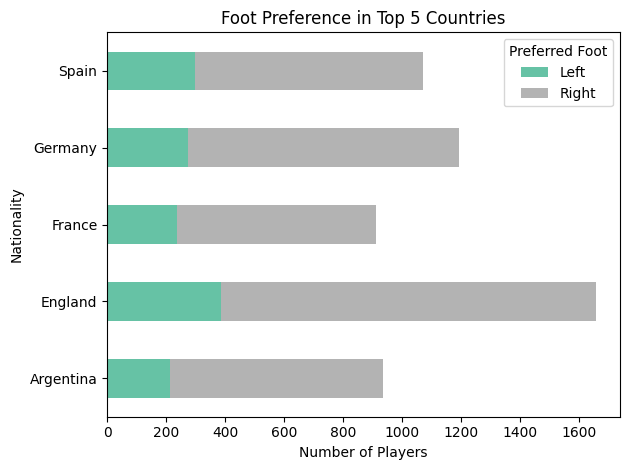

In [50]:
# 4b. Horizontal Stacked Bar Chart: Foot Preference by Top Countries
top_countries = fifa['Nationality'].value_counts().head(5).index
foot_data = fifa[fifa['Nationality'].isin(top_countries)].groupby(['Nationality', 'Preferred Foot']).size().unstack().fillna(0)
foot_data.plot(kind='barh', stacked=True, colormap='Set2')
plt.title('Foot Preference in Top 5 Countries')
plt.xlabel('Number of Players')
plt.tight_layout()
plt.show()

# Grouped bar plot

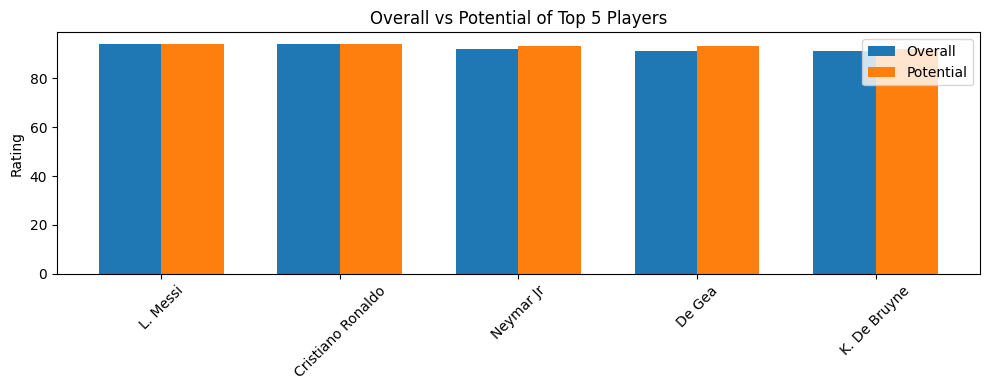

In [51]:
# 5a. Grouped Bar Chart: Overall & Potential for Top 5 Players
top_players = fifa[['Name', 'Overall', 'Potential']].head(5)
labels = top_players['Name']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.bar(x - width/2, top_players['Overall'], width, label='Overall')
rects2 = ax.bar(x + width/2, top_players['Potential'], width, label='Potential')

ax.set_ylabel('Rating')
ax.set_title('Overall vs Potential of Top 5 Players')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

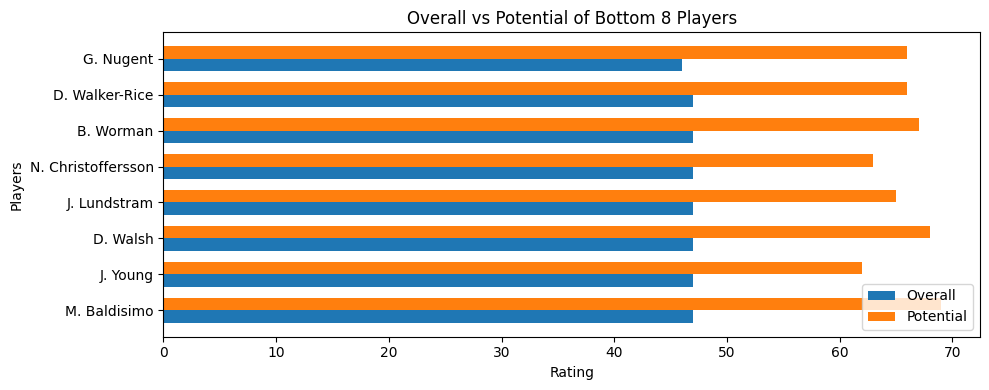

In [52]:
# 5b. Grouped Bar Chart: Overall & Potential for Bottom 8 Players
bottom_players = fifa[['Name', 'Overall', 'Potential']].tail(8)
labels = bottom_players['Name']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.barh(x - width/2, bottom_players['Overall'], width, label='Overall')
rects2 = ax.barh(x + width/2, bottom_players['Potential'], width, label='Potential')

ax.set_ylabel('Players')
ax.set_xlabel('Rating')
ax.set_title('Overall vs Potential of Bottom 8 Players')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

### What if we want to add values to the plot?

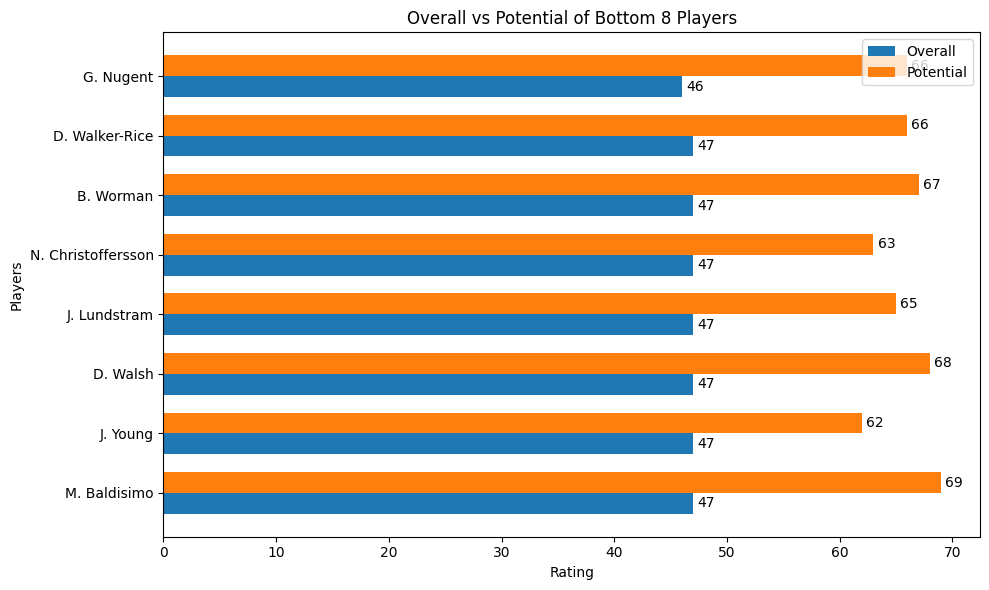

In [53]:
# 5c. Grouped Bar Chart: Overall & Potential for Bottom 8 Players, wtih values
bottom_players = fifa[['Name', 'Overall', 'Potential']].tail(8)
labels = bottom_players['Name']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.barh(x - width/2, bottom_players['Overall'], width, label='Overall')
rects2 = ax.barh(x + width/2, bottom_players['Potential'], width, label='Potential')

ax.set_ylabel('Players')
ax.set_xlabel('Rating')
ax.set_title('Overall vs Potential of Bottom 8 Players')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

# Add values
ax.bar_label(rects1, fmt='%.0f', padding=3)
ax.bar_label(rects2, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

## Do the numbers look good outside of the bars?

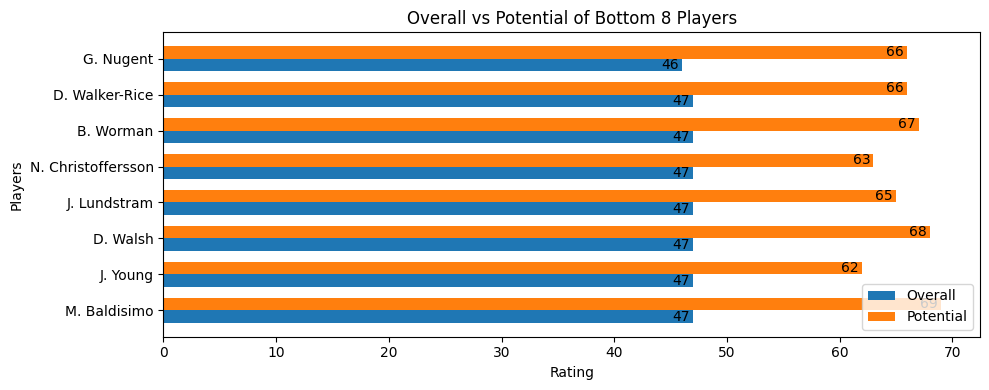

In [54]:
# 5d. Grouped Bar Chart: Overall & Potential for Bottom 8 Players, wtih values
bottom_players = fifa[['Name', 'Overall', 'Potential']].tail(8)
labels = bottom_players['Name']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,4))
rects1 = ax.barh(x - width/2, bottom_players['Overall'], width, label='Overall')
rects2 = ax.barh(x + width/2, bottom_players['Potential'], width, label='Potential')

ax.set_ylabel('Players')
ax.set_xlabel('Rating')
ax.set_title('Overall vs Potential of Bottom 8 Players')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()

# Add values, with negative padding
ax.bar_label(rects1, fmt='%.0f', padding=-15)
ax.bar_label(rects2, fmt='%.0f', padding=-15)

plt.tight_layout()
plt.show()

# Dot plots

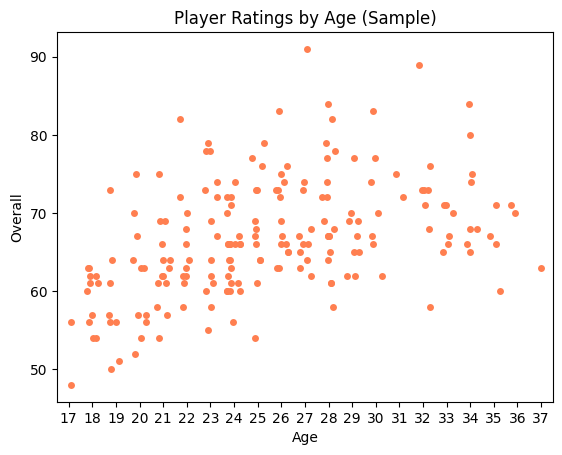

In [55]:
# 6a. Dot Plot: Overall Rating by Age (Sample of 200)
sample_df = fifa[['Age', 'Overall']].sample(200, random_state=1)
sns.stripplot(data=sample_df, x='Age', y='Overall', jitter=0.3, color='coral')
plt.title('Player Ratings by Age (Sample)')
plt.show()

## Open question: Is this a good plot?

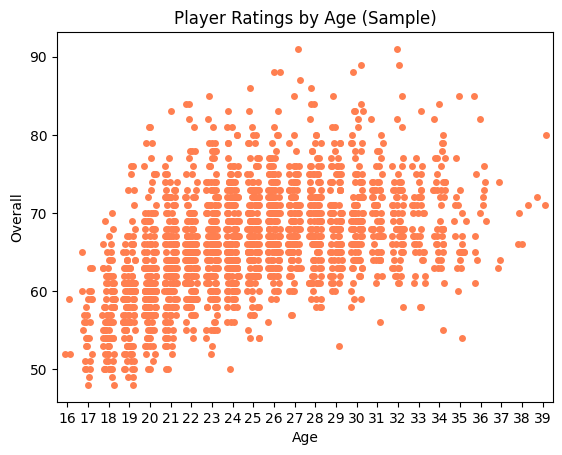

In [56]:
# 6b. Dot Plot: Overall Rating by Age (Sample of 2000)
sample_df = fifa[['Age', 'Overall']].sample(2000, random_state=1)
sns.stripplot(data=sample_df, x='Age', y='Overall', jitter=0.3, color='coral')
plt.title('Player Ratings by Age (Sample)')
plt.show()

# Dot plot as a substitute of horizontal bar plot

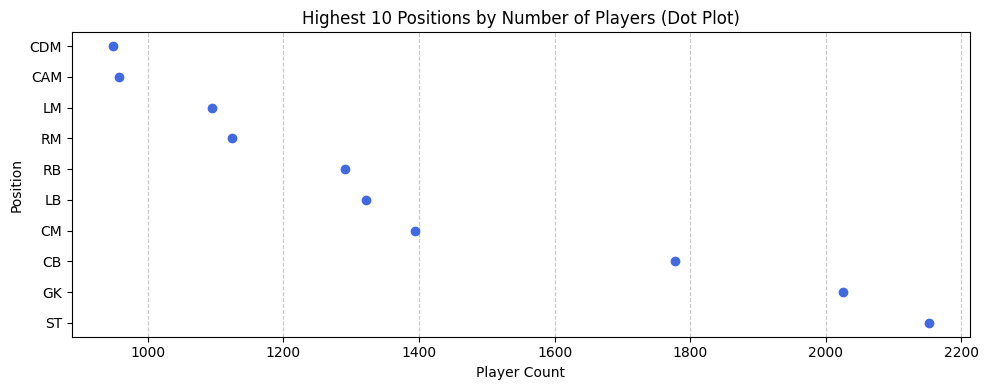

In [57]:
# 7 (related to plot number 3d): Top 10 Positions by Player Count
position_counts = fifa['Position'].value_counts().head(10)
positions = position_counts.index
player_counts = position_counts.values

# Create the dot plot
plt.figure(figsize=(10, 4))
plt.plot(player_counts, positions, 'o', color='royalblue') # 'o' creates a dot plot
plt.title('Highest 10 Positions by Number of Players (Dot Plot)')
plt.ylabel('Position')
plt.xlabel('Player Count')
plt.xticks() # Keep original xticks for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout()
plt.show()

# Why Dot plots can be beneficial?
What if we plot all the values, not just bottom or top?

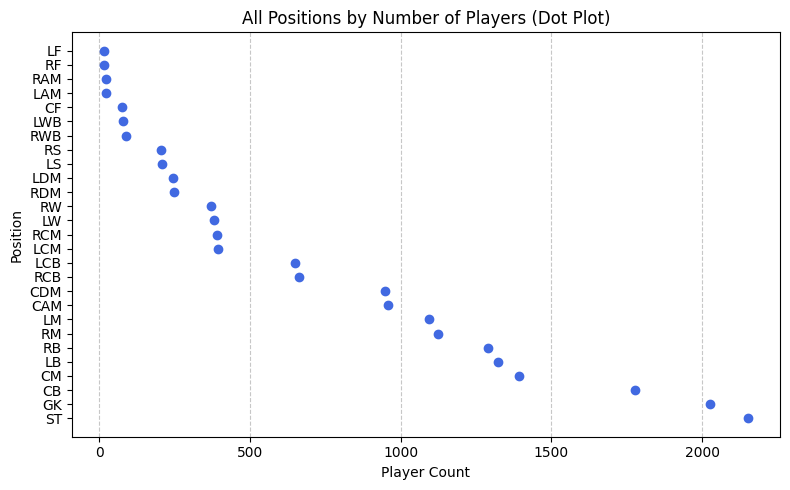

In [58]:
# 7b (related to plot number 3d): All Positions by Player Count
position_counts = fifa['Position'].value_counts()
positions = position_counts.index
player_counts = position_counts.values

# Create the dot plot
plt.figure(figsize=(8, 5))
plt.plot(player_counts, positions, 'o', color='royalblue') # 'o' creates a dot plot
plt.title('All Positions by Number of Players (Dot Plot)')
plt.ylabel('Position')
plt.xlabel('Player Count')
plt.xticks() # Keep original xticks for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout()
plt.show()

# Heatmap
One of the best plots to show correlation among variables.

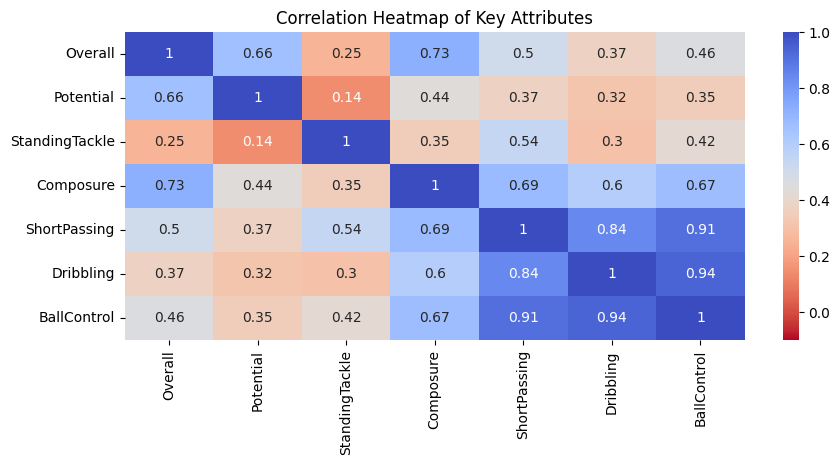

In [59]:
# 8a. Heatmap: Correlation of Key Attributes
key_attrs = ['Overall', 'Potential', 'StandingTackle', 'Composure', 'ShortPassing', 'Dribbling', 'BallControl']
plt.figure(figsize=(10,4))
sns.heatmap(fifa[key_attrs].corr(), annot=True,vmin=-0.1, cmap='coolwarm_r')
plt.title('Correlation Heatmap of Key Attributes')
plt.show()

## Let's compare related variables

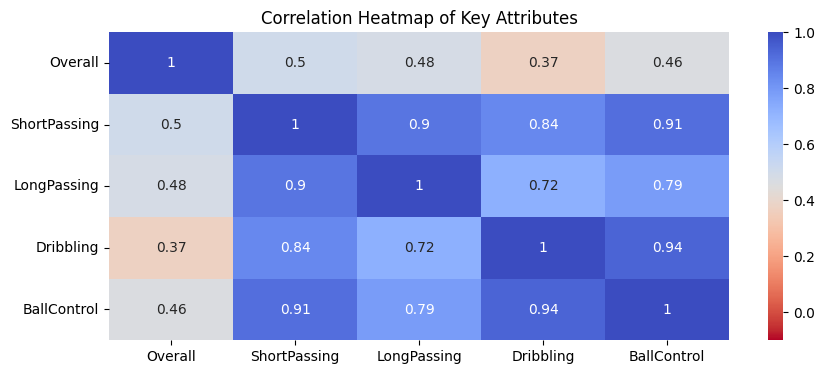

In [60]:
# 8b. Heatmap: Correlation of Related Attributes
key_attrs = ['Overall', 'ShortPassing', 'LongPassing', 'Dribbling', 'BallControl']
plt.figure(figsize=(10,4))
sns.heatmap(fifa[key_attrs].corr(), annot=True,vmin=-0.1, cmap='coolwarm_r')
plt.title('Correlation Heatmap of Key Attributes')
plt.show()

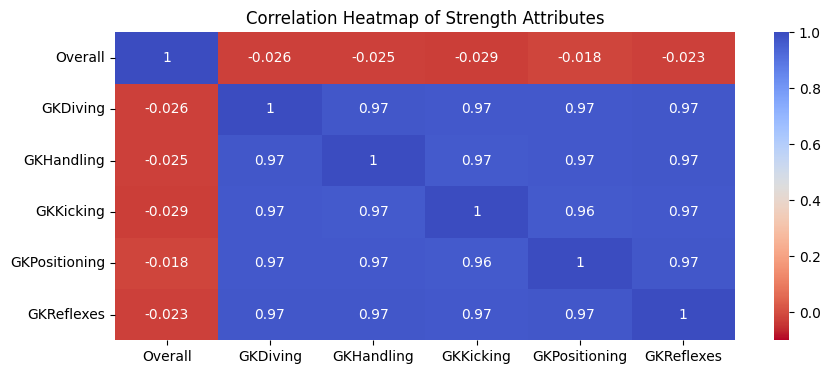

In [61]:
# 8c. Heatmap: Correlation of related Attributes: Goal Keeper with overall
gk_attrs = ['Overall', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
plt.figure(figsize=(10,4))
sns.heatmap(fifa[gk_attrs].corr(), annot=True,vmin=-0.1, cmap='coolwarm_r')
plt.title('Correlation Heatmap of Strength Attributes')
plt.show()

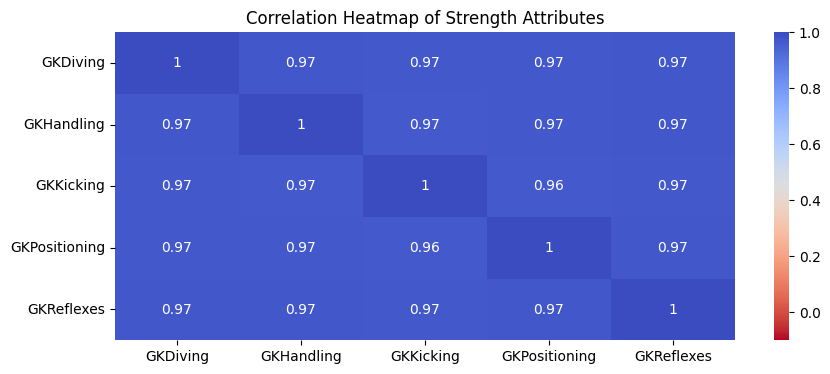

In [62]:
# 8d. Heatmap: Correlation of related Attributes: Goal Keeper
gk_attrs = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
plt.figure(figsize=(10,4))
sns.heatmap(fifa[gk_attrs].corr(), annot=True, vmin=-0.1, cmap='coolwarm_r')
plt.title('Correlation Heatmap of Strength Attributes')
plt.show()

# Bullet Chart

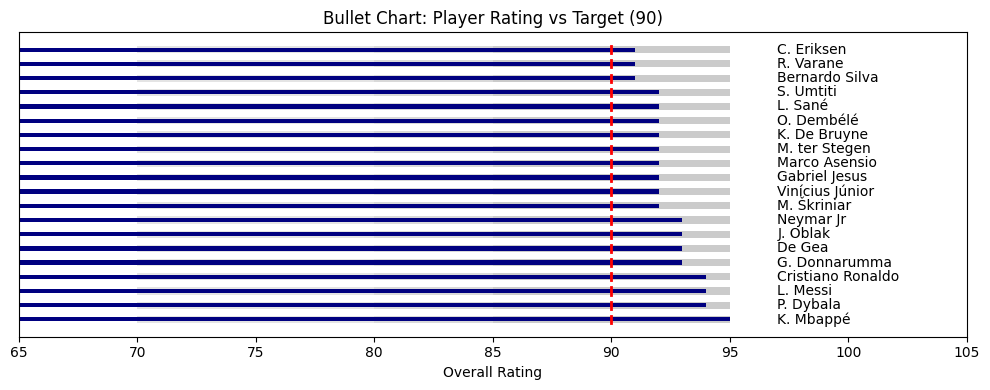

In [63]:
# 9a. Bullet Chart: Player rating as per potential

# Choose top 20 rated players
top_players = fifa.sort_values(by='Potential', ascending=False).head(20)

# Target and performance thresholds
target_rating = 90
performance_bands = [(70, 80, 'lightgray'), (80, 85, 'silver'), (85, 95, 'darkgray')]

fig, ax = plt.subplots(figsize=(10, 4))

# Plot bullet chart for each player
for i, row in enumerate(top_players.iterrows()):
    player = row[1]
    y = i  # Vertical position

    # Background bands
    for low, high, color in performance_bands:
        ax.barh(y, high - low, left=low, height=0.5, color=color, alpha=0.6)

    # Actual score bar
    ax.barh(y, player['Potential'], color='navy', height=0.3)

    # Target line
    ax.plot([target_rating, target_rating], [y - 0.25, y + 0.25], color='red', lw=2)

    # Label
    ax.text(97, y, player['Name'], va='center', fontsize=10)

# Formatting
ax.set_xlim(65, 105)
ax.set_yticks([])
ax.set_xlabel("Overall Rating")
ax.set_title("Bullet Chart: Player Rating vs Target (90)")
plt.tight_layout()
plt.show()


# **What if we plot 'Overall' instead of 'Potential'?**

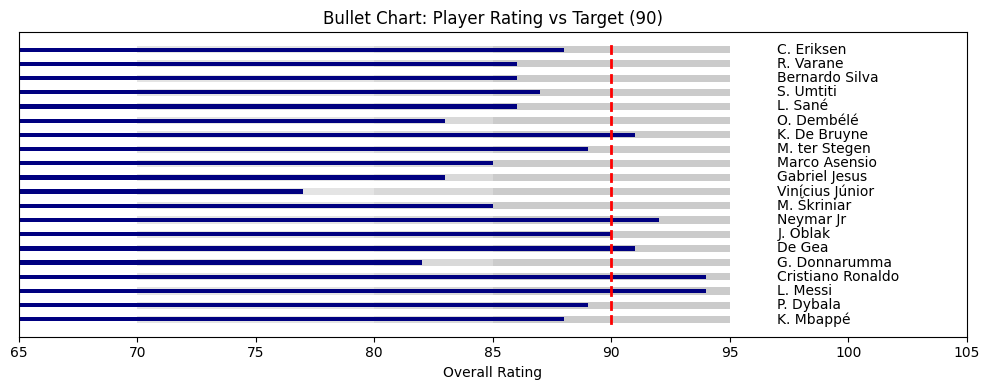

In [64]:
# 9b. Bullet Chart: Player rating as per potential

# Choose top 20 rated players
top_players = fifa.sort_values(by='Potential', ascending=False).head(20)

# Target and performance thresholds
target_rating = 90
performance_bands = [(70, 80, 'lightgray'), (80, 85, 'silver'), (85, 95, 'darkgray')]

fig, ax = plt.subplots(figsize=(10, 4))

# Plot bullet chart for each player
for i, row in enumerate(top_players.iterrows()):
    player = row[1]
    y = i  # Vertical position

    # Background bands
    for low, high, color in performance_bands:
        ax.barh(y, high - low, left=low, height=0.5, color=color, alpha=0.6)

    # Alert: We are ploting 'Overall' instead of Potential
    ax.barh(y, player['Overall'], color='navy', height=0.3)

    # Target line
    ax.plot([target_rating, target_rating], [y - 0.25, y + 0.25], color='red', lw=2)

    # Label
    ax.text(97, y, player['Name'], va='center', fontsize=10)

# Formatting
ax.set_xlim(65, 105)
ax.set_yticks([])
ax.set_xlabel("Overall Rating")
ax.set_title("Bullet Chart: Player Rating vs Target (90)")
plt.tight_layout()
plt.show()


### What if we check the bottom 20 players?

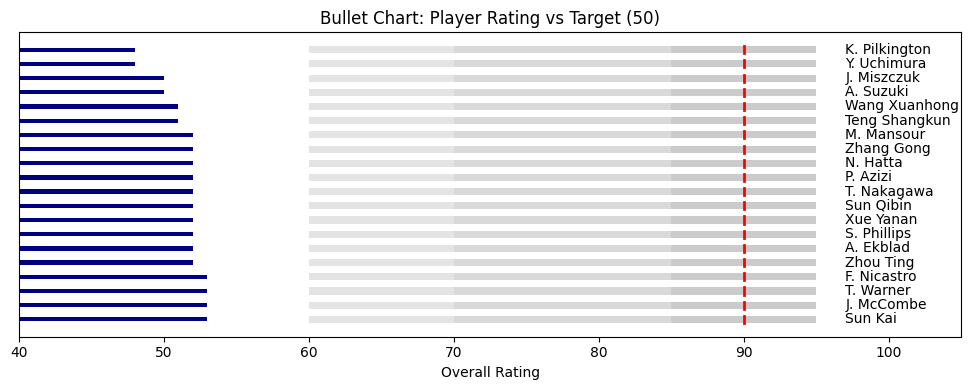

In [68]:
# 9c. Bullet Chart: Player rating

# Choose bottom 20 rated players as per potential
bottom_players = fifa.sort_values(by='Potential', ascending=False).tail(20)

# Target and performance thresholds
target_rating = 90
performance_bands = [(60, 70, 'lightgray'), (70, 85, 'silver'), (85, 95, 'darkgray')]

fig, ax = plt.subplots(figsize=(10, 4))

# Plot bullet chart for each player
for i, row in enumerate(bottom_players.iterrows()):
    player = row[1]
    y = i  # Vertical position

    # Background bands
    for low, high, color in performance_bands:
        ax.barh(y, high - low, left=low, height=0.5, color=color, alpha=0.6)

    # Actual score bar
    ax.barh(y, player['Potential'], color='navy', height=0.3)

    # Target line
    ax.plot([target_rating, target_rating], [y - 0.25, y + 0.25], color='red', lw=2)

    # Label
    ax.text(97, y, player['Name'], va='center', fontsize=10)

# Formatting
ax.set_xlim(40, 105)
ax.set_yticks([])
ax.set_xlabel("Overall Rating")
ax.set_title("Bullet Chart: Player Rating vs Target (50)")
plt.tight_layout()
plt.show()


## Bottom players are too far away? Let's change the scales

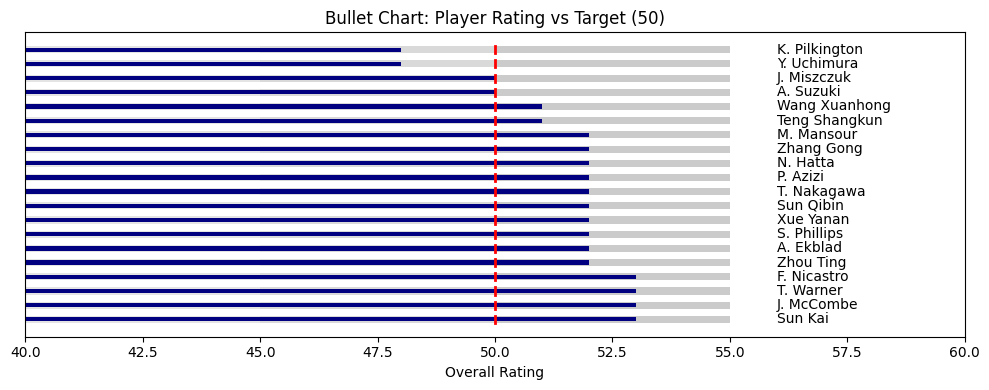

In [66]:
# 9d. Bullet Chart: Player rating

# Choose bottom 20 rated players
bottom_players = fifa.sort_values(by='Potential', ascending=False).tail(20)

# Target and performance thresholds
target_rating = 50
performance_bands = [(40, 45, 'lightgray'), (45, 50, 'silver'), (50, 55, 'darkgray')]

fig, ax = plt.subplots(figsize=(10, 4))

# Plot bullet chart for each player
for i, row in enumerate(bottom_players.iterrows()):
    player = row[1]
    y = i  # Vertical position

    # Background bands
    for low, high, color in performance_bands:
        ax.barh(y, high - low, left=low, height=0.5, color=color, alpha=0.6)

    # Actual score bar
    ax.barh(y, player['Potential'], color='navy', height=0.3)

    # Target line
    ax.plot([target_rating, target_rating], [y - 0.25, y + 0.25], color='red', lw=2)

    # Label
    ax.text(56, y, player['Name'], va='center', fontsize=10)

# Formatting
ax.set_xlim(40, 60)
ax.set_yticks([])
ax.set_xlabel("Overall Rating")
ax.set_title("Bullet Chart: Player Rating vs Target (50)")
plt.tight_layout()
plt.show()


# **What if we plot 'Overall' instead of 'Potential' again?**

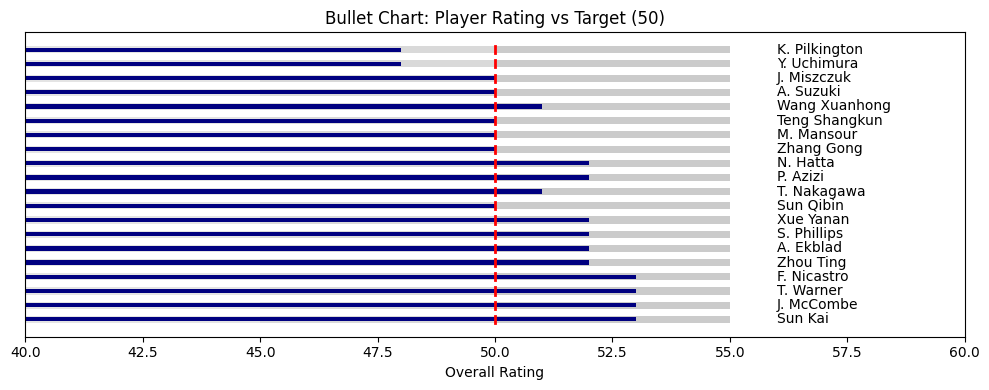

In [67]:
# 9e. Bullet Chart: Player rating

# Choose bottom 20 rated players
bottom_players = fifa.sort_values(by='Potential', ascending=False).tail(20)

# Target and performance thresholds
target_rating = 50
performance_bands = [(40, 45, 'lightgray'), (45, 50, 'silver'), (50, 55, 'darkgray')]

fig, ax = plt.subplots(figsize=(10, 4))

# Plot bullet chart for each player
for i, row in enumerate(bottom_players.iterrows()):
    player = row[1]
    y = i  # Vertical position

    # Background bands
    for low, high, color in performance_bands:
        ax.barh(y, high - low, left=low, height=0.5, color=color, alpha=0.6)

    # Alert: We are ploting 'Overall' instead of Potential
    ax.barh(y, player['Overall'], color='navy', height=0.3)

    # Target line
    ax.plot([target_rating, target_rating], [y - 0.25, y + 0.25], color='red', lw=2)

    # Label
    ax.text(56, y, player['Name'], va='center', fontsize=10)

# Formatting
ax.set_xlim(40, 60)
ax.set_yticks([])
ax.set_xlabel("Overall Rating")
ax.set_title("Bullet Chart: Player Rating vs Target (50)")
plt.tight_layout()
plt.show()

*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*